# T3.2 Algoritmo Perceptrón

# Índice

1. Algoritmo Perceptrón
2. Implementación
3. Ejemplo
4. Convergencia y calidad de la solución

# 1. Algoritmo Perceptrón

Primer algoritmo de aprendizaje automático, propuesto por Frank Rosenblatt en 1958.

**Entrada:** $\;$ un conjunto de entrenamiento, $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\},\,$ con $\;\boldsymbol{x}_n\in\mathbb{R}^D\,$ y $\,y_n\in\{1,\dotsc,C\}\,$ para todo $n$.

**Salida:** $\;$ los pesos de un clasificador lineal, $\;c(\boldsymbol{x}) = \operatorname{argmax}\limits_c\; g_c(\boldsymbol{x}),\;$ con $\,g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x} + w_{c0}\,$ para todo $c$.

**Notación homogénea o compacta:** $\;\boldsymbol{x}=(1,x_1,\dotsc,x_D)^t\,$ y $\,\boldsymbol{w}_c=(w_{c0},w_{c1},\dotsc,w_{cD})^t;\quad$ así, $\;g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x}$

**Objetivo:** $\;$ minimizar el número de errores en entrenamiento (riesgo empírico con pérdida 01):
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(y_n\neq c(\boldsymbol{x}_n))%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)>g_{y_n}(\boldsymbol{x}_n))$$

**Objetivo con margen $b\geq 0$:** $\;$ extensión del objetivo básico ($b=0$) para generalizar mejor:
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)+b>g_{y_n}(\boldsymbol{x}_n))$$
*Interpretación:* $\;$ la pseudo-probabilidad de pertenecer en la clase correcta tiene que superar la de cualquier clase rival con al menos un margen $b$.

**Algoritmo Perceptrón:** $\;$ versión básica con **factor de aprendizaje** $\,\alpha>0\,$ para controlar la velocidad del aprendizaje.
> **Entrada:** $\;$ datos $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\quad$ pesos iniciales $\;\{\boldsymbol{w}_c\}\quad$ factor de aprendizaje $\;\alpha\in\mathbb{R}^{>0}\quad$ margen $\;b\in\mathbb{R}^{\geq 0}$

> **Salida:** $\;$ pesos optimizados $\;\{\boldsymbol{w}_c\}$

> `repetir`

>> `para toda` $\;$ dato $\,\boldsymbol{x}_n$

>>> *err* = `falso`

>>> `para toda` $\;$ clase $\,c\neq y_n$

>>>> `sí` $\;\boldsymbol{w}_c^t\boldsymbol{x}_n+b>\boldsymbol{w}_{y_n}^t\boldsymbol{x}_n:\quad\boldsymbol{w}_c=\boldsymbol{w}_c-\alpha\boldsymbol{x}_n;\quad$ *err* = `cierto`

>>>
>>> `sí` $\;$ err: $\quad \boldsymbol{w}_{y_n}=\boldsymbol{w}_{y_n}+\alpha\boldsymbol{x}_n$
>
> `hasta que` $\;$ no quedan muestras mal clasificadas

*Nota: los pesos iniciales $\;\{\boldsymbol{w}_c\}$ pueden ser pesos nulos, pesos inicializados con la media de los vectores de características de la clase, pesos provenientes de un modelo previo entrenado con otros datos, etc. Por defecto, asumiremos que son pesos nulos.*

# 2. Implementación 

En la práctica limitaremos el número de iteraciones del algoritmo, ya que no converge si las clases no son linealmente separables.

**Nota:** el [operador @](https://peps.python.org/pep-0465/) denota multiplicación de matrices.

In [3]:
import numpy as np
def perceptron(X, y, b=0.1, a=1.0, K=200):
    N, D = X.shape;
    Y = np.unique(y);
    C = Y.size;
    W = np.zeros((1+D, C));
    for k in range(1, K+1):
        E = 0
        for n in range(N):
            xn = np.array([1, *X[n, :]]);
            cn = np.squeeze(np.where(Y==y[n]));
            gn = W[:,cn].T @ xn;
            err = False;
            for c in np.arange(C):
                if c != cn and W[:,c].T @ xn + b >= gn:
                    W[:, c] = W[:, c] - a*xn; 
                    err = True;
            if err:
                W[:, cn] = W[:, cn] + a*xn; 
                E = E + 1;
        if E == 0:
            break
    return W, E, k

# 3. Ejemplo

**Entrada:** 

$\quad C=2$; $\quad D=2$;

$\quad\boldsymbol{x}_1=(0,0)^t$ $\;\to\;$ $\boldsymbol{x}_1=(1,0,0)^t$; $\quad y_1=1$;

$\quad\boldsymbol{x}_2=(1,1)^t$ $\;\to\;$ $\boldsymbol{x}_1=(1,1,1)^t$; $\quad y_2=2$; 

$\quad\alpha=1$; $\quad b=0.1$;

**Traza:**
<center>

|Iteración|$n$|$g_{y_n}(\boldsymbol{x}_n) = \boldsymbol{w}_{y_n}^t\boldsymbol{x}_n$|$c: c\neq y_n$|$g_{c}(\boldsymbol{x}_n) =  \boldsymbol{w}_c^t\boldsymbol{x}_n+b$|$\boldsymbol{w}_1^t$|$\boldsymbol{w}_2^t$|Comentarios|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
||||||$(0,0,0)$|$(0,0,0)$|Pesos iniciales|
|$1$|$1$|$(0,0,0)(1,0,0)^t=0$|$2$|$(0,0,0)(1,0,0)^t+0.1=0.1$||$(-1,0,0)$|Error: $g_{c} \ge g_{y_n}$|
||||||$(1,0,0)$|||
||$2$|$(-1,0,0)(1,1,1)^t=-1$|$1$|$(1,0,0)(1,1,1)^t+0.1=1.1$|$(0,-1,-1)$||Error: $g_{c} \ge g_{y_n}$|
|||||||$(0,1,1)$||
|$2$|$1$|$(0,-1,-1)(1,0,0)^t=0$|$2$|$(0,1,1)(1,0,0)^t+0.1=0.1$||$(-1,1,1)$|Error: $g_{c} \ge g_{y_n}$|
||||||$(1,-1,-1)$|||
||$2$|$(-1,1,1)(1,1,1)^t=1$|$1$|$(1,-1,-1)(1,1,1)^t+0.1=-0.9$|||Ok!|
|$3$|$1$|$(1,-1,-1)(1,0,0)^t=1$|$2$|$(-1,1,1)(1,0,0)^t+0.1=-0.9$|||Ok!|
||$2$|$(-1,1,1)(1,1,1)^t=1$|$1$|$(1,-1,-1)(1,1,1)^t+0.1=-0.9$|||Ok!|

</center>

In [4]:
X = np.array([[0, 0], [1, 1]])
y = np.array([0, 1], dtype=int)
W, E, k = perceptron(X, y)
print("w1 =", W[:,0].T, "  w2 =", W[:,1].T, "  E =", E, "  k =", k)

w1 = [ 1. -1. -1.]   w2 = [-1.  1.  1.]   E = 0   k = 3


**Frontera de decisión:** $\quad g_1(\boldsymbol{x}) = g_2(\boldsymbol{x})\;\to\;\boldsymbol{w}_1^t(1, x_1, x_2)^t=\boldsymbol{w}_2^t(1, x_1, x_2)^t\;\to\;x_2=-x_1+1$

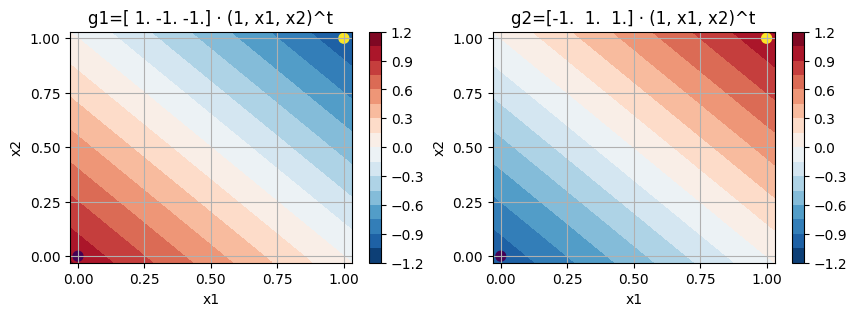

In [16]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float);
y = np.array([1, 2]).astype(int);
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50));
XX = np.c_[np.ravel(x1), np.ravel(x2)];
Wt = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float);
gg = lambda x: (Wt[0, 0] + Wt[0, 1:] @ x, Wt[1, 0] + Wt[1, 1:] @ x);
GG = np.apply_along_axis(gg, 1, XX);
_, axs = plt.subplots(1, 2, figsize=(10, 3));
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 5)); 
    ax.set_yticks(np.linspace(0., 1, 5));
    ax.grid(); 
    ax.set_xlabel("x1"); ax.set_ylabel("x2");
    ax.set_title(f'g{i+1}={W[:,i]} · (1, x1, x2)^t');
    cp = ax.contourf(x1, x2, GG[:, i].reshape(x1.shape), 15, cmap='RdBu_r');
    plt.colorbar(cp, ax=ax); 
    ax.scatter(*X.T, c=y, s=50);

# 4. Convergencia y calidad de la solución

**Convergencia:** $\;$ Perceptrón converge (deja de iterar) si los datos son **linealmente separables**.

**Efecto del factor de aprendizaje $\alpha>0$:** $\;$ converge con independencia del valor elegido, aunque lentamente si $\alpha$ es muy pequeño.

**Efecto del margen $b\geq 0$:** $\;$ converge con fronteras centradas si elegimos un valor próximo al máximo margen que permite discriminar linealmente las muestras con margen; si nos pasamos, Perceptrón no converge.
* Hay que hacer experimentos con diferentes valores del margen $b$ para encontrar un valor que generalice óptimamente.